In [3]:
%matplotlib inline
import plotly as py
import plotly.graph_objs as go

py.offline.init_notebook_mode(connected=True)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

colors = ['k','b','r','m','g','Brown','DarkBlue','Tomato','Violet', 'Tan','Salmon','Pink',
          'SaddleBrown', 'SpringGreen', 'RosyBrown','Silver',]

def dft_my_impl(data):
    n = len(data)
    out = []
    for k in range(n):
        v = np.imag(0)
        for t in range(n):
            angle = 2j * np.pi * t * k / n
            v += data[t] * np.exp(-angle)
        out.append(v)
    return out

def idft_my_impl(data):
    n = len(data)
    out = []
    for k in range(n):
        v = np.imag(0)
        for t in range(n):
            angle = 2j * np.pi * t * k / n
            v += data[t] * np.exp(angle)
        out.append(v / n)
    return out

def plot_transforms(ax, x, transforms, labels, linestyles = [], what = 'both'):
    for i, (tr, label) in enumerate(zip(transforms, labels)):
        linestyle = linestyles[i] if len(linestyles) > i else None
        if what in ('real', 'both'):
            ax.plot(x, [v.real for v in tr], label=label + ' real', linestyle=linestyle, color=colors[i % len(colors)], alpha=0.5)

        if what in ('imag', 'both'):
            ax.plot(x, [v.imag for v in tr], label=label + ' imag', linestyle=linestyle, color=colors[(i + 1) % len(colors)], alpha=0.25)

def print_mse(dft, fft, prefix=''):
    mse = mean_squared_error(dft, fft)
    if isinstance(mse, np.complex):
        print('%s Mean Squared Error: (%.2g, %.2g)' % (prefix, mse.real, mse.imag))
    else:
        print('%s Mean Squared Error: %.2g' % (prefix, mse))

DFT/FFT Mean Squared Error: (3.6e-25, -1.1e-25)
IDFT/DATA Mean Squared Error: (-8.6e-28, 2.1e-28)


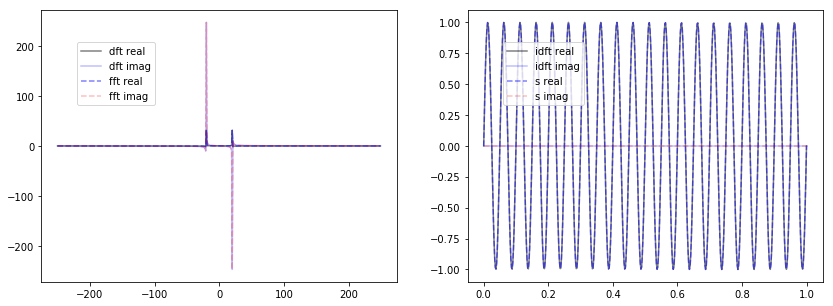

In [96]:
N = 500
T = 1.0 # s

f = 20 # Hz
w = 2 * np.pi * f

t = np.linspace(0, T, N)
s = np.sin(w * t / T)

Nyq = N / (2 * T)
df = 1 / T
k = [i * df - Nyq for i in range(N)]

dft = dft_my_impl(s)
idft = idft_my_impl(dft)
dft = np.fft.fftshift(dft)
fft = np.fft.fftshift(np.fft.fft(s))

print_mse(dft, fft, 'DFT/FFT')
print_mse(idft, s, 'IDFT/DATA')

fig = plt.figure(figsize=(14, 5))

gs = gridspec.GridSpec(1, 2)

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

plot_transforms(ax0, k, [dft, fft], ['dft', 'fft'], [None, '--'])
ax0.legend(loc=(0.1, 0.65))

plot_transforms(ax1, t, [idft, s], ['idft', 's'], [None, '--'])
ax1.legend(loc=(0.1, 0.65))

plt.show()

DFT/FFT Mean Squared Error: (-2.3e-25, -1.5e-25)
IDFT/DATA Mean Squared Error: (-1.2e-27, 1.3e-28)


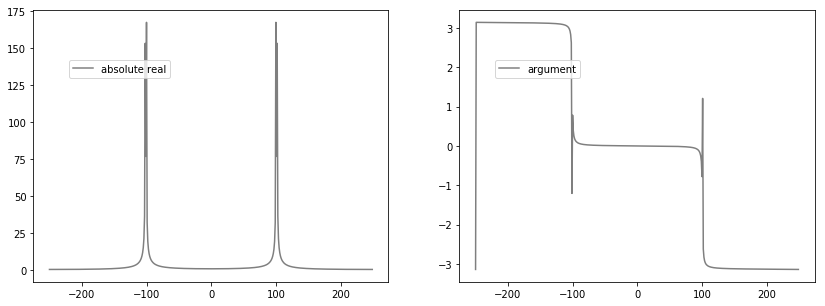

'file:///home/akarpovskii/Programming/Signals/plot.html'

In [4]:
N = 500
T = 1.0 # s
Nyq = N / (2 * T)
df = 1 / T
f1 = 100 # Hz
f2 = 101.5
w1 = 2 * np.pi * f1
w2 = 2 * np.pi * f2

t = np.linspace(0, T, N)
s = (np.sin(w1 * t / T) + np.sin(w2 * t / T)) / np.sqrt(2)

k = [i * df - Nyq for i in range(N)]

dft = dft_my_impl(s)
idft = idft_my_impl(dft)
dft = np.fft.fftshift(dft)
fft = np.fft.fftshift(np.fft.fft(s))

print_mse(dft, fft, 'DFT/FFT')
print_mse(idft, s, 'IDFT/DATA')

fig = plt.figure(figsize=(14, 5))

gs = gridspec.GridSpec(1, 2)

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

plot_transforms(ax0, k, [np.absolute(dft).real], ['absolute'], [None, '--'], what='real')
ax0.legend(loc=(0.1, 0.75))

ax1.plot(k, np.angle(dft), label='argument', color=colors[0], alpha=0.5)
ax1.legend(loc=(0.1, 0.75))

plt.show()

trace = go.Scatter(
    x = k,
    y = np.absolute(dft).real)

py.offline.plot([trace], filename = 'plot.html', auto_open=False)

In [17]:
N = 500
T = 1.0 # s
Nyq = N / (2 * T)
df = 1 / T
f = 115.5 # Hz
w = 2 * np.pi * f

t = np.linspace(0, T, N)
s = [np.sin(w * (_t if i < N * 3 / 5 else (_t + np.pi / 4)) / T) for i, _t in enumerate(t)]

k = [i * df - Nyq for i in range(N)]

dft = dft_my_impl(s)
idft = idft_my_impl(dft)
dft = np.fft.fftshift(dft)
fft = np.fft.fftshift(np.fft.fft(s))

print_mse(dft, fft, 'DFT/FFT')
print_mse(idft, s, 'IDFT/DATA')

angle = go.Scatter(
    x = k,
    y = np.angle(dft),
    name='angle'
)

absolute = go.Scatter(
    x = k,
    y = np.absolute(dft).real,
    name='absolute'
)

signal = go.Scatter(
    x = t,
    y = s,
    name='signal'
)

fig = py.tools.make_subplots(rows = 2, cols = 2)

fig['layout'].update(height=900, width=1800)

fig.append_trace(signal, 1, 1)
fig.append_trace(absolute, 1, 2)
fig.append_trace(angle, 2, 1)

py.offline.iplot(fig)

DFT/FFT Mean Squared Error: (-3.1e-25, -1.4e-25)
IDFT/DATA Mean Squared Error: (-1.7e-27, 2.4e-29)
This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



DFT/FFT Mean Squared Error: (-3.1e-25, -1.5e-25)
IDFT/DATA Mean Squared Error: (-1.6e-27, -1.2e-29)


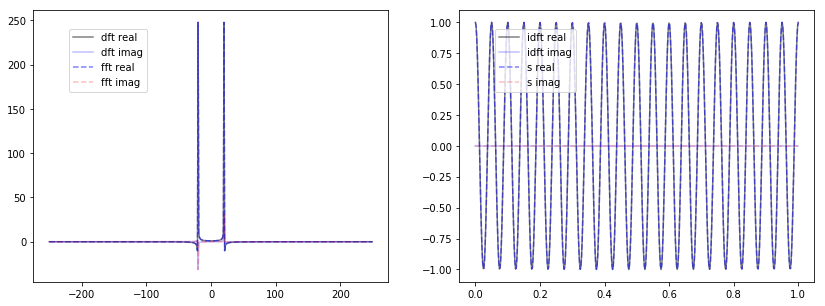

In [5]:
N = 500
T = 1.0 # s
Nyq = N / (2 * T)
df = 1 / T
f = 20 # Hz
w = 2 * np.pi * f

t = np.linspace(0, T, N)
s = np.cos(w * t / T)

k = [i * df - Nyq for i in range(N)]

dft = dft_my_impl(s)
idft = idft_my_impl(dft)
dft = np.fft.fftshift(dft)
fft = np.fft.fftshift(np.fft.fft(s))

print_mse(dft, fft, 'DFT/FFT')
print_mse(idft, s, 'IDFT/DATA')
fig = plt.figure(figsize=(14, 5))

gs = gridspec.GridSpec(1, 2)

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

plot_transforms(ax0, k, [dft, fft], ['dft', 'fft'], [None, '--'])
ax0.legend(loc=(0.1, 0.7))

plot_transforms(ax1, t, [idft, s], ['idft', 's'], [None, '--'])
ax1.legend(loc=(0.1, 0.7))

plt.show()

DFT/FFT Mean Squared Error: (-1.5e-30, 5.3e-29)
IDFT/DATA Mean Squared Error: (1.3e-30, 7.8e-31)


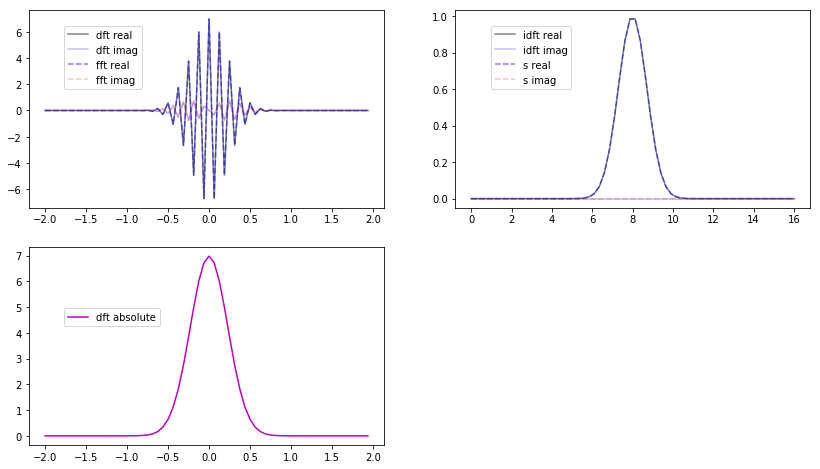

In [6]:
N = 64
T = 16.0 # s
Nyq = N / (2 * T)
df = 1 / T
f = 20 # Hz
w = 2 * np.pi * f

t = np.linspace(0, T, N)
s = np.exp(-(t - T / 2) * (t - T / 2))

k = [i * df - Nyq for i in range(N)]

dft = dft_my_impl(s)
idft = idft_my_impl(dft)
dft = np.fft.fftshift(dft)
fft = np.fft.fftshift(np.fft.fft(s))

print_mse(dft, fft, 'DFT/FFT')
print_mse(idft, s, 'IDFT/DATA')
fig = plt.figure(figsize=(14, 8))

gs = gridspec.GridSpec(2, 2)

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])

plot_transforms(ax0, k, [dft, fft], ['dft', 'fft'], [None, '--'])
ax0.legend(loc=(0.1, 0.6))

plot_transforms(ax1, t, [idft, s], ['idft', 's'], [None, '--'])
ax1.legend(loc=(0.1, 0.6))

ax2.plot(k, np.absolute(dft).real, label='dft absolute', color=colors[3])
ax2.legend(loc=(0.1, 0.6))

plt.show()

DFT/FFT Mean Squared Error: (-3.4e-27, -2.6e-27)
IDFT/DATA Mean Squared Error: (-1.2e-29, 5.3e-31)


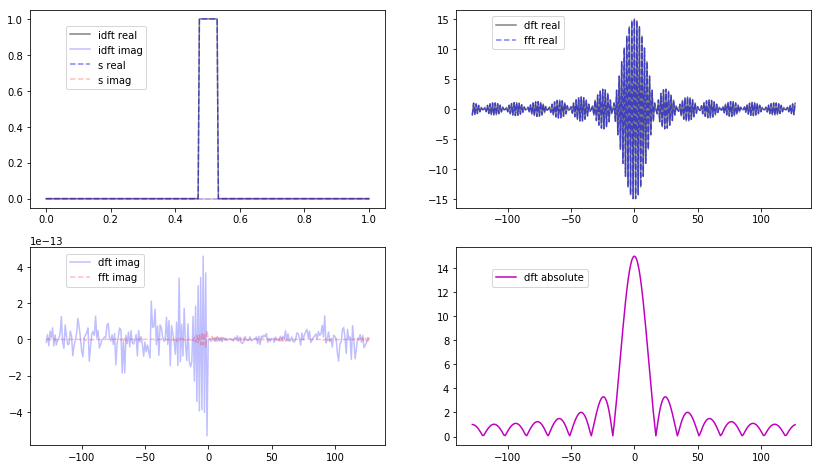

In [7]:
N = 256
T = 1.0 # s
Nyq = N / (2 * T)
df = 1 / T
f = 50 # Hz
w = 2 * np.pi * f

t = np.linspace(0, T, N)
s = [1 if n > N / 2 - 8 and n < N / 2 + 8 else 0 for n in range(N)]

k = [i * df - Nyq for i in range(N)]

dft = dft_my_impl(s)
idft = idft_my_impl(dft)
dft = np.fft.fftshift(dft)
fft = np.fft.fftshift(np.fft.fft(s))

print_mse(dft, fft, 'DFT/FFT')
print_mse(idft, s, 'IDFT/DATA')
fig = plt.figure(figsize=(14, 8))

gs = gridspec.GridSpec(2, 2)

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])

plot_transforms(ax0, t, [idft, s], ['idft', 's'], [None, '--'])
ax0.legend(loc=(0.1, 0.6))

plot_transforms(ax1, k, [dft, fft], ['dft', 'fft'], [None, '--'], what='real')
ax1.legend(loc=(0.1, 0.8))

plot_transforms(ax2, k, [dft, fft], ['dft', 'fft'], [None, '--'], what='imag')
ax2.legend(loc=(0.1, 0.8))

ax3.plot(k, np.absolute(dft).real, label='dft absolute', color=colors[3])
ax3.legend(loc=(0.1, 0.8))

plt.show()